<h1 align=center>Multiple Linear Regression</h1>

In [1]:
#import all required libraries

import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
#load dataset
X_train, y_train = load_data_multi()

display first five elements of X_train, y_train

In [5]:
print("First Five Elements of X_train: \n", X_train[:5])
print("First Five Elements of y_train: \n", y_train[:5])

First Five Elements of X_train: 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
First Five Elements of y_train: 
 [399900. 329900. 369000. 232000. 539900.]


In [6]:
# Dimensions of X_train and y_train
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)

Shape of X_train:  (47, 2)
Shape of y_train:  (47,)


In [7]:
#select features from training data
feature1 = X_train[:,0]
feature2 = X_train[:,1]

<IPython.core.display.Javascript object>


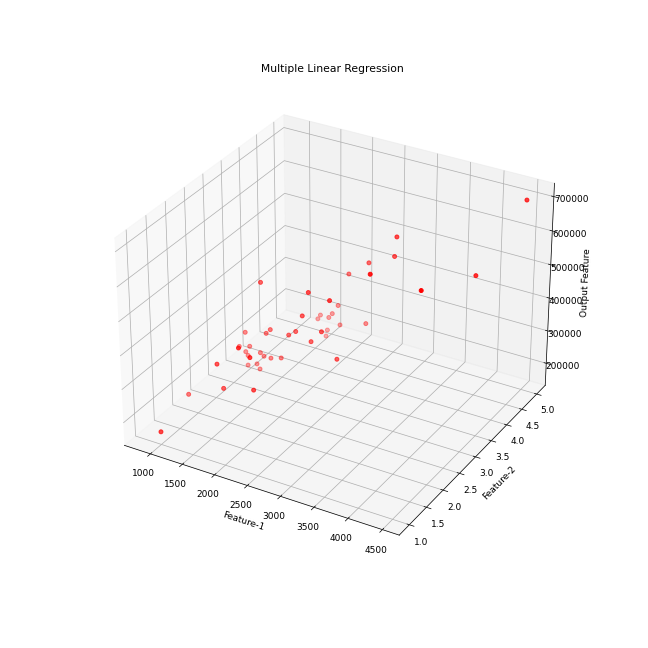

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(feature1, feature2, y_train, c='r', marker='o')

ax.set_xlabel('Feature-1')
ax.set_ylabel('Feature-2')
ax.set_zlabel('Output Feature')
ax.set_title('Multiple Linear Regression')

plt.show()


## Exercise 1

In [15]:
import numpy as np

def compute_cost(X, y, W, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        X (ndarray): Shape (m, 2) Input to the model 
        y (ndarray): Shape (m,) Label 
        W (ndarray): Shape (2,) weights/coefficients for the input features
        b (scalar): Intercept of the model
    
    Returns
        total_cost (float): The cost of using W, b as the parameters for linear regression
                            to fit the data points in X and y
    """
    # number of training examples
    m = X.shape[0]
    
    # get predictions
    predictions = np.dot(X, W) + b
    
    # compute loss
    loss = predictions - y
    
    # compute the mean squared error
    total_cost = np.mean(loss ** 2) / 2
    
    return total_cost


In [16]:
import numpy as np

# Compute cost with some initial values for parameters weights, b
initial_w1, initial_w2 = 0, 0
initial_b = 0

# Array of weights
weights = np.array([initial_w1, initial_w2])

# Compute the cost
cost = compute_cost(X_train, y_train, weights, initial_b)

# Print the results
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')


<class 'numpy.float64'>
Cost at initial w: 65591548106.457


## Exercise 2

In [20]:
import numpy as np

def compute_gradient(X, y, W, b):
    """
    Computes the gradient for multiple linear regression.

    Args:
        X (ndarray): Shape (m, 2) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        W (ndarray): Shape (2,) Parameters of the model
        b (scalar): Parameter of the model

    Returns:
        dj_dw1 (scalar): The gradient of the cost w.r.t. the parameter w1
        dj_dw2 (scalar): The gradient of the cost w.r.t. the parameter w2
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples
    m = X.shape[0]

    # Compute predictions
    predictions = np.dot(X, W) + b

    # Compute gradients
    dj_db = np.mean(predictions - y)
    dj_dw1 = np.mean((predictions - y) * X[:, 0])
    dj_dw2 = np.mean((predictions - y) * X[:, 1])

    return dj_dw1, dj_dw2, dj_db


In [21]:
import numpy as np

# Compute and display gradient with W initialized to zeroes
initial_w1, initial_w2 = 0, 0
initial_b = 0

# Array of weights
weights = np.array([initial_w1, initial_w2])

# Compute the gradient
tmp_dj_dw1, tmp_dj_dw2, tmp_dj_db = compute_gradient(X_train, y_train, weights, initial_b)

# Print the gradient
print('Gradient at initial W(w1, w2), b (zeros):', tmp_dj_dw1, tmp_dj_dw2, tmp_dj_db)


Gradient at initial W(w1, w2), b (zeros): -764209128.1914893 -1120367.7021276595 -340412.6595744681


## Exercise 3

In [24]:
import copy
import math
import numpy as np

def gradient_descent(X, y, W, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
        X (ndarray): Shape (m, 2)
        y (ndarray): Shape (m,)
        W (ndarray): Shape (2,) Initial values of parameters of the model
        b_in (scalar): Initial value of the parameter b of the model
        cost_function: Function to compute the cost
        gradient_function: Function to compute the gradient
        alpha (float): Learning rate
        num_iters (int): Number of iterations to run gradient descent

    Returns:
        w1 (scalar): Updated value of the parameter w1 after running gradient descent
        w2 (scalar): Updated value of the parameter w2 after running gradient descent
        b (scalar): Updated value of the parameter b after running gradient descent
        J_history (list): Cost values at each iteration
        w_history (list): Iteration values at intervals for graphing
    """

    # Number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration - primarily for graphing later
    J_history = []
    w_history = []

    W = copy.deepcopy(W)  # Avoid modifying global W within the function
    w1 = W[0]
    w2 = W[1]
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw1, dj_dw2, dj_db = gradient_function(X, y, W, b)

        w1 -= alpha * dj_dw1
        w2 -= alpha * dj_dw2
        b -= alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # Prevent resource exhaustion
            cost = cost_function(X, y, [w1, w2], b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(i)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w1, w2, b, J_history, w_history  # Return w1, w2, b, J, w history for graphing


In [25]:
initial_w1, initial_w2 = 0,0
initial_b = 0

#array of weights
weights = np.array([initial_w1, initial_w2])


# some gradient descent settings
iterations = 15000

alpha = 0.001

w1,w2,b,J_history,_ = gradient_descent(X_train ,y_train, weights, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w1,w2,b found by gradient descent:", w1,w2, b)

#To get the basic idea of how the cost function varies with the parameters,
# Plot the learning curve

Iteration    0: Cost 1348743126785340416.00
Iteration 1500: Cost 988720186169644044779520.00
Iteration 3000: Cost 1858051073136497369546752.00
Iteration 4500: Cost 2536501160477971546374144.00
Iteration 6000: Cost 3208162132678391013310464.00
Iteration 7500: Cost 3931130336151081242853376.00
Iteration 9000: Cost 4720791253905048055316480.00
Iteration 10500: Cost 5581049474857888447987712.00
Iteration 12000: Cost 6512877921157455552708608.00
Iteration 13500: Cost 7516516168909754984300544.00
w1,w2,b found by gradient descent: 1928337463.5082343 1696987.3771882853 340412.55622003955


## Exercise 4

In [35]:
m = X_train.shape[0]
predicted = np.zeros(m)
weights = np.array([w1, w2])

for i in range(m):
    predicted[i] = np.dot(X_train[i], weights) + b

print(predicted)

[4.05722745e+12 3.08534537e+12 4.62801534e+12 2.73052958e+12
 5.78501952e+12 3.82775699e+12 2.95807510e+12 2.75174299e+12
 2.66111113e+12 2.88094160e+12 3.74098181e+12 3.85668036e+12
 3.64456324e+12 8.63510399e+12 2.44513734e+12 4.43518329e+12
 2.54540919e+12 2.38343054e+12 5.03103957e+12 5.84479798e+12
 3.40737773e+12 3.64070487e+12 3.09305872e+12 3.78340523e+12
 7.50123816e+12 2.12117664e+12 2.81152145e+12 4.87098586e+12
 4.24234785e+12 5.08503132e+12 3.54621633e+12 1.92833950e+12
 3.93381555e+12 6.04920005e+12 3.49222627e+12 2.77102637e+12
 2.38921555e+12 4.11122260e+12 8.12794954e+12 4.16907272e+12
 3.20875727e+12 4.31562467e+12 4.95004940e+12 2.31401039e+12
 1.64294725e+12 3.57128811e+12 2.31979540e+12]


In [36]:
print(y_train)

[399900. 329900. 369000. 232000. 539900. 299900. 314900. 198999. 212000.
 242500. 239999. 347000. 329999. 699900. 259900. 449900. 299900. 199900.
 499998. 599000. 252900. 255000. 242900. 259900. 573900. 249900. 464500.
 469000. 475000. 299900. 349900. 169900. 314900. 579900. 285900. 249900.
 229900. 345000. 549000. 287000. 368500. 329900. 314000. 299000. 179900.
 299900. 239500.]


In [38]:
predict1 = np.dot(np.array([2500,5]), weights) + b
print(predict1)

4820852484120.028
